# SMS Classifier 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset 

In [2]:
df=pd.read_csv("sms_spam.csv")

## Display Data

In [3]:
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [4]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [5]:
df.tail()

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [6]:
df.columns

Index(['type', 'text'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [8]:
df.describe().T

,count,unique,top,freq
type,5559,2,ham,4812
text,5559,5156,"Sorry, I'll call later",30


In [9]:
df1=df.copy()

In [10]:
df1.dtypes

type    object
text    object
dtype: object

In [11]:
df1["type"].value_counts(normalize=True)*100

type
ham     86.562331
spam    13.437669
Name: proportion, dtype: float64

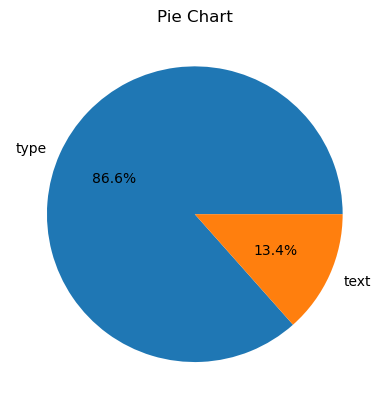

In [12]:
plt.pie(df1["type"].value_counts(normalize=True)*100,labels=df.columns,autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df1.dtypes

type    object
text    object
dtype: object

In [16]:
df1["type"]=le.fit_transform(df1["type"])
df1["text"]=le.fit_transform(df1["text"])

In [17]:
df1.head()

,type,text
0,0,1609
1,0,2487
2,0,251
3,1,5016
4,1,5080


<Axes: >

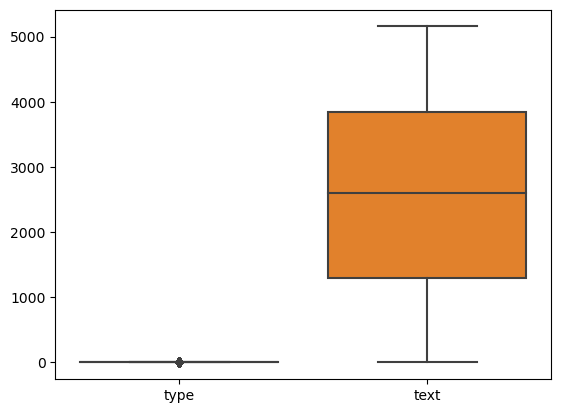

In [18]:
sns.boxplot(df1)

## Split Data X and Y

In [19]:
x=df1.drop(["type"],axis=1)

In [20]:
y=df1["type"]

## Scaling

In [21]:
from scipy.stats import zscore

In [22]:
x_sc=x.apply(zscore)

## Data Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=1)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
lr.score(x_train,y_train)*100

86.6876545986058

In [29]:
lr.score(x_test,y_test)*100

86.06115107913669

In [30]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

In [31]:
y_true,y_pred=y_test,lr.predict(x_test)

In [32]:
accuracy_score(y_true,y_pred)*100

86.06115107913669

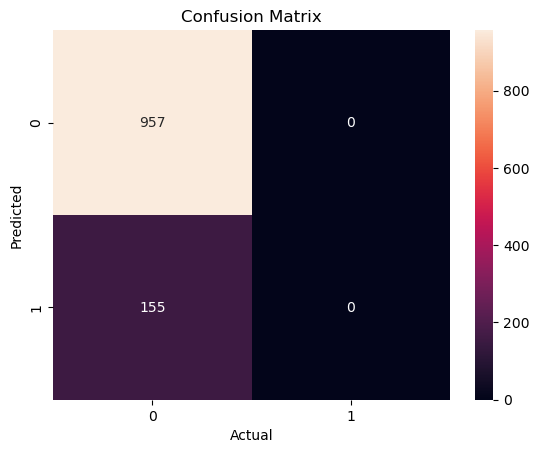

In [33]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Bagging Classifier

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
bgc=BaggingClassifier()

In [36]:
bgc.fit(x_train,y_train)

BaggingClassifier()

In [37]:
bgc.score(x_train,y_train)*100

98.83067236339105

In [38]:
bgc.score(x_test,y_test)*100

90.73741007194245

In [39]:
y_true,y_pred=y_test,bgc.predict(x_test)

In [40]:
precision_score(y_true,y_pred)*100

67.56756756756756

In [41]:
recall_score(y_true,y_pred)*100

64.51612903225806

In [42]:
accuracy_score(y_true,y_pred)*100

90.73741007194245

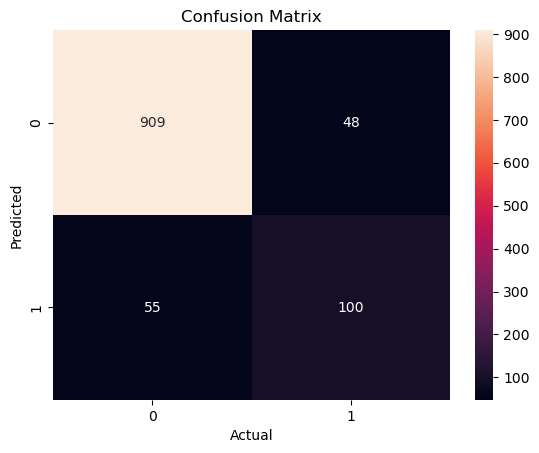

In [43]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Ada Boost Classsifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada=AdaBoostClassifier()

In [46]:
ada.fit(x_train,y_train)

C:\Users\Vaishnavi Chavan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [47]:
ada.score(x_train,y_train)*100

86.6876545986058

In [48]:
ada.score(x_test,y_test)*100

86.06115107913669

In [49]:
y_true,y_pred=y_test,ada.predict(x_test)

In [50]:
precision_score(y_true,y_pred)*100

C:\Users\Vaishnavi Chavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [51]:
recall_score(y_true,y_pred)*100

0.0

In [52]:
accuracy_score(y_true,y_pred)*100

86.06115107913669

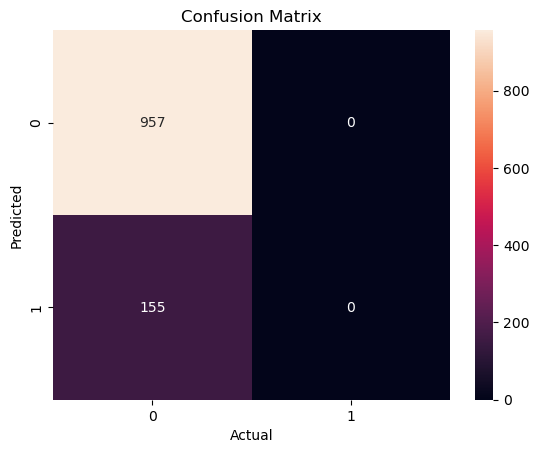

In [53]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc=DecisionTreeClassifier()

In [56]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
dtc.score(x_train,y_train)*100

100.0

In [58]:
dtc.score(x_test,y_test)*100

90.73741007194245

In [59]:
y_true,y_pred=y_test,dtc.predict(x_test)

In [60]:
precision_score(y_true,y_pred)*100

66.0493827160494

In [61]:
recall_score(y_true,y_pred)*100

69.03225806451613

In [62]:
accuracy_score(y_true,y_pred)*100

90.73741007194245

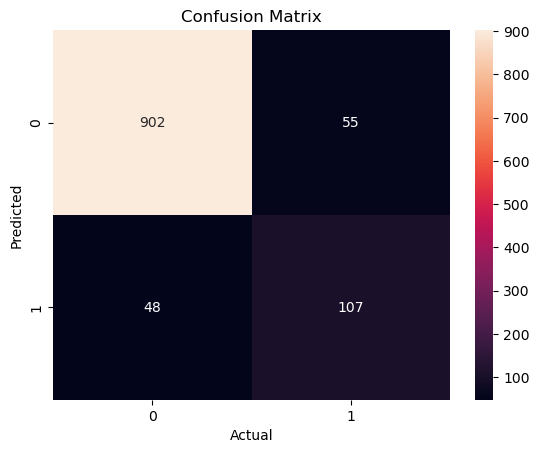

In [63]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Random Foreset Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc=RandomForestClassifier()

In [66]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
rfc.score(x_train,y_train)*100

100.0

In [68]:
rfc.score(x_test,y_test)*100

90.73741007194245

In [69]:
y_true,y_pred=y_test,rfc.predict(x_test)

In [70]:
precision_score(y_true,y_pred)*100

66.0493827160494

In [71]:
recall_score(y_true,y_pred)*100

69.03225806451613

In [72]:
accuracy_score(y_true,y_pred)*100

90.73741007194245

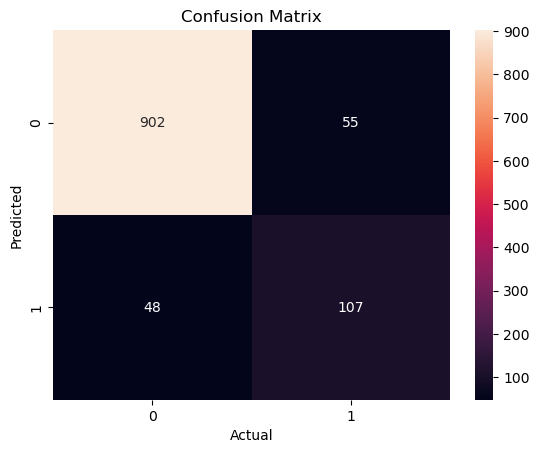

In [73]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Model Evaluation

In [76]:
model_evaluation=pd.DataFrame(data={"Algorithm Name":["Logistic Regression","Bagging Classifier","Ada Boost Classifier","Decision Tree Classifier","Random Forest Classifier"],"Training Score":[86.68,98.78,86.68,100,100],"Testing Score":[86.06,91.18,86.06,98,90],"Error":[0.62,7.6,0.62,2,10],"Accuracy":[86.06,91.18,86.06,90.73,90.73]})

In [77]:
model_evaluation

,Algorithm Name,Training Score,Testing Score,Error,Accuracy
0,Logistic Regression,86.68,86.06,0.62,86.06
1,Bagging Classifier,98.78,91.18,7.60,91.18
2,Ada Boost Classifier,86.68,86.06,0.62,86.06
3,Decision Tree Classifier,100.00,98.00,2.00,90.73
4,Random Forest Classifier,100.00,90.00,10.00,90.73


In [78]:
# Note :  We choose the Decision Tree Classifier as a fit Model